<a href="https://colab.research.google.com/github/SiyuFang/STAT6289/blob/master/HW3_Fang_Siyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Visualize the original result
## Load the data

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

path= 'https://raw.githubusercontent.com/SiyuFang/STAT6289/master/TSLA.csv'
df = pd.read_csv(path,error_bad_lines=False)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


## Split the data into training and test sets

In [2]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

## Lag1

In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#(740, 60, 1)

(740, 60, 1)


## Build the model

In [4]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0744
Epoch 2/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0168
Epoch 3/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0126
Epoch 4/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0122
Epoch 5/100
24/24 [==============================] - 3s 122ms/step - loss: 0.0126
Epoch 6/100
24/24 [==============================] - 3s 126ms/step - loss: 0.0142
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0119
Epoch 8/100
24/24 [==============================] - 3s 119ms/step - loss: 0.0124
Epoch 9/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0105
Epoch 11/100
24/24 [==============================] - 3s 120ms/step - loss: 0.0094
Epoch 12/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0098
Epoch 13/100


## Prepare the test data (reshape them):


In [5]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (528, 60, 1)

(528, 60, 1)


## Make Predictions using the test set

In [6]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## Visualize the results

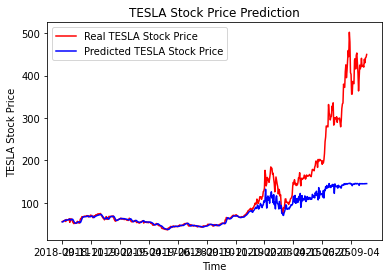

In [7]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price' )
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# 2. Change to Lag7

In [8]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(106, 60, 1)


In [9]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
4/4 [==============================] - 0s 78ms/step - loss: 0.2228
Epoch 2/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0410
Epoch 3/100
4/4 [==============================] - 0s 82ms/step - loss: 0.0224
Epoch 4/100
4/4 [==============================] - 0s 83ms/step - loss: 0.0317
Epoch 5/100
4/4 [==============================] - 0s 84ms/step - loss: 0.0166
Epoch 6/100
4/4 [==============================] - 0s 80ms/step - loss: 0.0240
Epoch 7/100
4/4 [==============================] - 0s 87ms/step - loss: 0.0197
Epoch 8/100
4/4 [==============================] - 0s 86ms/step - loss: 0.0128
Epoch 9/100
4/4 [==============================] - 0s 88ms/step - loss: 0.0141
Epoch 10/100
4/4 [==============================] - 0s 81ms/step - loss: 0.0109
Epoch 11/100
4/4 [==============================] - 0s 88ms/step - loss: 0.0122
Epoch 12/100
4/4 [==============================] - 0s 92ms/step - loss: 0.0113
Epoch 13/100
4/4 [==============================]

In [10]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 60, 1)


In [11]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

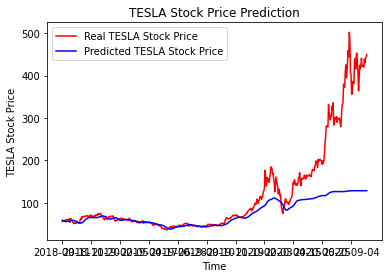

In [12]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price' )
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# 3. Change to Lag14

In [13]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(53, 60, 1)


In [14]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 72ms/step - loss: 0.3229
Epoch 2/100
2/2 [==============================] - 0s 50ms/step - loss: 0.2159
Epoch 3/100
2/2 [==============================] - 0s 64ms/step - loss: 0.0920
Epoch 4/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0398
Epoch 5/100
2/2 [==============================] - 0s 54ms/step - loss: 0.0721
Epoch 6/100
2/2 [==============================] - 0s 50ms/step - loss: 0.0229
Epoch 7/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0321
Epoch 8/100
2/2 [==============================] - 0s 49ms/step - loss: 0.0544
Epoch 9/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0370
Epoch 10/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0308
Epoch 11/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0201
Epoch 12/100
2/2 [==============================] - 0s 56ms/step - loss: 0.0214
Epoch 13/100
2/2 [==============================]

In [15]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 60, 1)


In [16]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

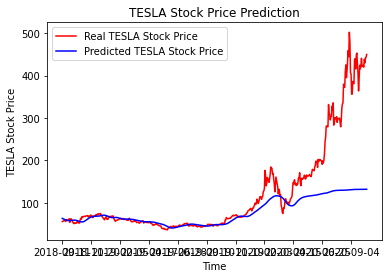

In [17]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price' )
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# 4. Two Comparisons: Compare with 4 hidden layers and 6 hidden layers & Compare with 32 batch size with 64 batch size

In [18]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(740, 60, 1)


In [19]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

In [20]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fifth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a sixth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

In [21]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.2))
# Adding the output layer
model2.add(Dense(units = 1))

In [22]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
model1.fit(X_train, y_train, epochs = 100, batch_size = 32)
model2.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0715
Epoch 2/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0173
Epoch 3/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0132
Epoch 4/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0135
Epoch 5/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0122
Epoch 6/100
24/24 [==============================] - 3s 115ms/step - loss: 0.0116
Epoch 7/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0107
Epoch 8/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0105
Epoch 9/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0117
Epoch 10/100
24/24 [==============================] - 3s 116ms/step - loss: 0.0114
Epoch 11/100
24/24 [==============================] - 3s 118ms/step - loss: 0.0111
Epoch 12/100
24/24 [==============================] - 3s 117ms/step - loss: 0.0098
Epoch 13/100


In [24]:
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 60, 1)


In [25]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price1 = model1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

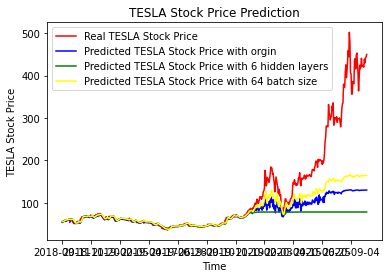

In [26]:
# Visualising the results
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
a = df.loc[800:,'Date']
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with orgin')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price1, color = 'green', label = 'Predicted TESLA Stock Price with 6 hidden layers')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price2, color = 'yellow', label = 'Predicted TESLA Stock Price with 64 batch size')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

# 5. make predictions for future two weeks, until Oct 28, 2020

In [27]:
import copy
X_test2 = copy.deepcopy(X_test)
for i in range(14):
    X_temp = np.zeros([1,60,1])
    for j in range(58):
        X_temp[0][j][0]= X_test[-1][j+1][0]
    X_temp[0][59][0] = model.predict(X_test2[-1:])[0][0]
    X_test2 = np.vstack([X_test2,X_temp])

predicted_stock_price = model.predict(X_test2)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price.shape

(542, 1)

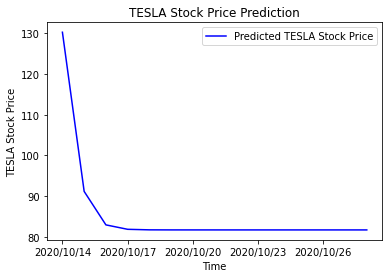

In [28]:
c = ["2020/10/14","2020/10/15","2020/10/16","2020/10/17","2020/10/18","2020/10/19","2020/10/20","2020/10/21","2020/10/22","2020/10/23","2020/10/24","2020/10/25","2020/10/26","2020/10/27","2020/10/28"]
plt.plot(c,predicted_stock_price[527:], color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xticks(np.arange(0,14,3))
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()